- 우리가 학습한 모델은 정확도가 100%이다.
- 하지만, 당연히 학습한 데이터로 검증을 하면 정확도가 높게 나온다.

> 따라서 trainSet, testSet 데이터를 분리하여 진행해야한다.

- 학습: 특징(x_train), 정답(y_train)
- 검증: 특징(x_test), 정답(y_test)

In [1]:
# 라이브러리 임포트

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#### 1. 학습(train) / 검증(test) 데이터 나누고 분석하기

In [2]:
# 도미 + 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]  # 리스트 내포
fish_target = [1] * 35 + [0] * 14 # 더 알아보기 쉬운 코드로 작성

총 : 49마리

simple validation(7:3, 8:2)
학습(train) : 검증(test) => 7:3, 8:2

train(35) : test(14)

학습할 때는 train 데이터로만 검증할 때는 test 데이터로만!

In [4]:
# 총 49마리
# 0~ 34번까지의 값
fish_data[0:35] # 0 ~ 34
fish_data[:35] # 처음부터(0) ~ 34

fish_data[35:50]
fish_data[35:] # 시작한 지점부터 끝까지

[[9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [5]:
# 0~34 : 35 학습데이터
train_input = fish_data[:35]
train_target = fish_target[:35]


# 35 ~ 49 테스트용 데이터
test_input = fish_data[35:]
test_target = fish_target[35:]

In [6]:
# sampling 편향 => 도미데이터만 다 학습시켜놓고 빙어데이터를 물어본 꼴

KN = KNeighborsClassifier()
KN.fit(train_input, train_target)

KNeighborsClassifier()

In [7]:
# test 결과 0.0%가 나온다.

KN.score(test_input, test_target)

0.0

In [8]:
# 샘플링 편향 문제 발생
# 샘플링 편향 문제는 TRAINSET과 TESTSET에 샘플이 골고루 들어가지 않아서 발생하는 문제이다.
# 랜덤 샘플링으로 문제를 해결할거야!

# fish_data, fish_target => List
# type cascading => to Numpy.array

input_arr = np.array(fish_data)
target_arr = np.array(fish_target) 


In [9]:
# 랜덤 샘플링 start
# 인덱스를 나열하고 이 인덱스들을 무작위로 섞어 35개와 14개로 쪼개는 방식을 택한다.
np.random.seed(42) # seed 맞추기, 랜덤 방식(마인크래프트 시드 생각해봐, 너가 원하는 지역으로 이동할 수 있지?)
idx = np.arange(49)  # 0 ~ 48까지 1씩증가하는 배열
np.random.shuffle(idx) 

In [ ]:
# 배열 인덱싱
# input_arr[[2, 3]] => 2번 인덱스와 3번 인덱스가 인덱싱 된다.
train_input = input_arr[idx[:35]]
train_target = target_arr[idx[:35]]

test_input = input_arr[idx[35:]]
test_target = target_arr[idx[35:]]

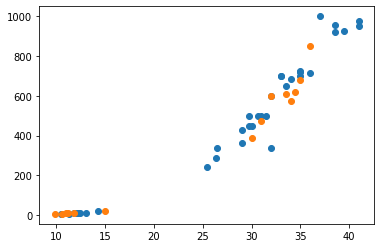

In [ ]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(test_input[:,0], test_input[:, 1])
plt.xlabel = "length"
plt.ylabel = "weight"
plt.show()

#### 5. 두 번째 분류모델

In [ ]:
# fit = 학습시킨다.
KN.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
KN.score(test_input, test_target)

1.0

In [ ]:
# 모델이 예측한 값들
KN.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

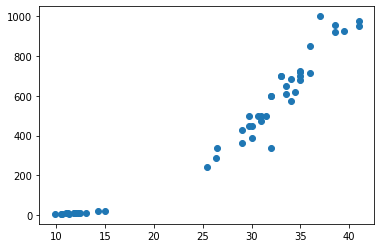

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(fish_length, fish_weight)
plt.xlabel = "length"
plt.ylabel = "weight"
plt.show()